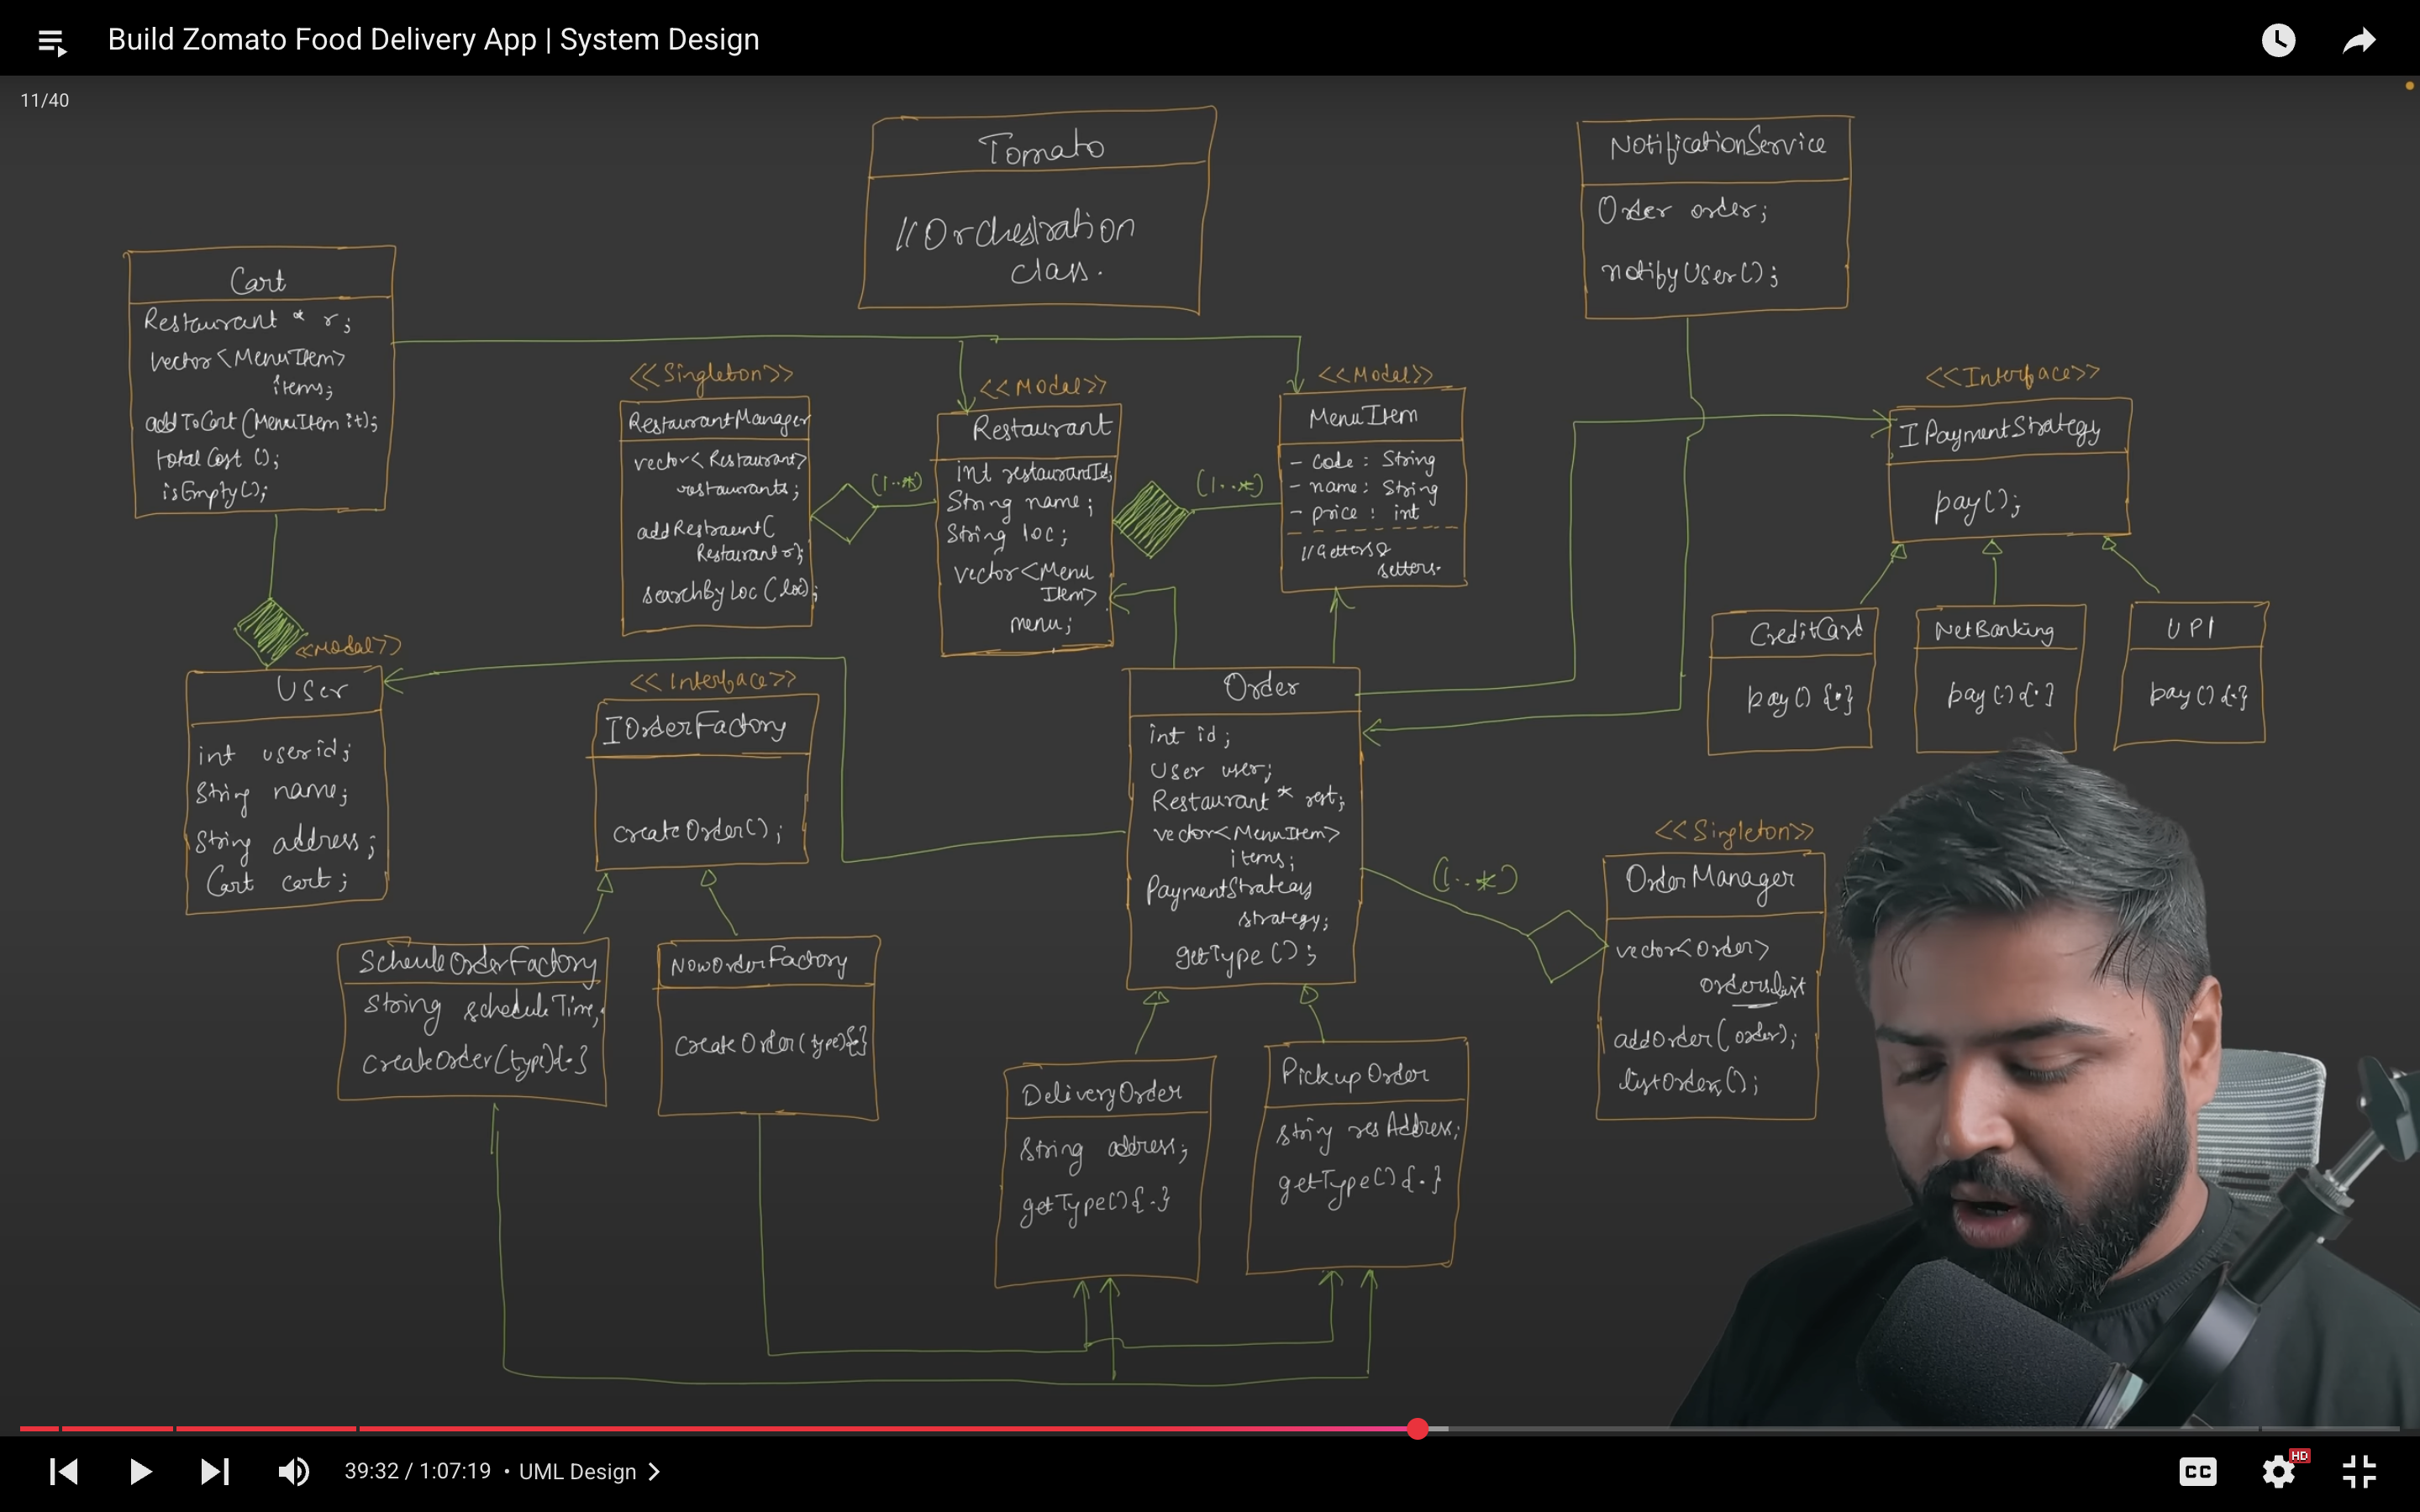

In [1]:
from IPython.display import Image, display

# Local file
display(Image(filename="zomato_swiggy.png"))

In [ ]:
"""
Functional Requirements:
1: User can search for restaurants based on location
2: User can add items to cart
3: User can checkout by making payment
4: User should be notified once order is placed successfully

Non-functional Requirements:
Each part of design should be scalable and modifiable

"""
from typing import List
from datetime import datetime, timezone

class PaymentMethod:
    UPI = 1
    CREDIT_CARD = 2
    DEBIT_CARD = 3
    CASH_ON_DELIVERY = 4


class OrderType:
    DELIVERY = 1
    PICKUP = 2

# Decorator to turn into singleton
def singleton(cls):
    instances = {}

    def get_instance(*args, **kwargs):
        if cls not in instances:
            instances[cls] = cls(*args, **kwargs)
        return instances[cls]
    
    return get_instance


class FoodItem:
    def __init__(self, code:int, name:int, cost:int, available_quantity=0, description="", image= None):
        self.code = code
        self.name = name
        self.cost = cost
        self.available_quantity = available_quantity
        self.description = description
        self.image = image

    def is_available(self, order_quantity):
        return order_quantity <= self.available_quantity
    
    def update_cost(self, cost):
        self.cost == cost
        return self.cost == cost
    
    def update_quantity(self, quantity):
        self.available_quantity = quantity
        return self.available_quantity == quantity
    
    def add_description(self, description):
        self.description = description


class Pizza(FoodItem):
    def __init__(self, cost, available_quantity, description, image):
        super().__init__(cost, available_quantity, description, image)


class Burger(FoodItem):
    def __init__(self, cost, available_quantity, description, image):
        super().__init__(cost, available_quantity, description, image)

        
class Restaurant:
    def __init__(self, address:int, name:str, food_items: List[FoodItem]):
        self.address = address
        self.name = name
        self.food_items = food_items

    def add_item(self, item: FoodItem):
        self.food_items.append(item)


class Cart:
    def __init__(self):
        self.restaurant = None
        self.added_items = []
        self.total = 0

    def add_item(self, item: FoodItem, restaurant: Restaurant, quantity:int):
        if self.restaurant != restaurant:
            self.added_items = []
        
        self.restaurant = restaurant
        self.added_items.append((item, quantity))
        self.total += item.cost * quantity

    def get_total_cost(self):
        return self.total
    
    def clear_cart(self):
        self.added_items = []
        self.restaurant = None
        self.total = 0

    def is_empty(self):
        return not self.added_items


class User:
    def __init__(self, id:int, name:str, phone:str, address: str):
        self.id = id
        self.name = name
        self.phone = phone
        self.address = address
        self.cart = Cart()

    def change_address(self, new_address):
        self.address = new_address

    def update_phone_number(self, new_phone_number):
        self.phone = new_phone_number


class Order:
    def __init__(self, id:int, ordered_items:List[FoodItem], user:User, restaurant:Restaurant, payment_strategy: PaymentMethod, scheduled: bool):
        self.id = id
        self.user = user
        self.restaurant = restaurant
        self.ordered_items = ordered_items
        self.total = total
        self.payment_strategy = payment_strategy
        self.scheduled = None

    def initiate_payment(self):
        paid = False
        if self.payment_strategy:
            self.payment_strategy.make_payment(self.total)

        return paid
    
    def get_type(self):
        return ""
    
    def set_address(self, user_address):
        pass


class DeliveryOrder(Order):
    def __init__(self, id:int, ordered_items:List[FoodItem], restaurant:Restaurant):
        super().__init__(id, total, ordered_items, restaurant)
        self.user_address = ""

    def set_address(self, user_address):
        self.user_address = user_address


class TakeAwayOrder(Order):
    def __init__(self, id:int, ordered_items:List[FoodItem], restaurant:Restaurant):
        super().__init__(id, total, ordered_items, restaurant)
        self.restaurant_address = ""

    def set_address(self, restaurant_address):
        self.restaurant_address = restaurant_address

class OrderFactory:
    def create_order(self, id:int, cart:Cart, ordered_items:List[FoodItem], user:User, restaurant:Restaurant, payment_strategy: PaymentMethod, order_type: str):
        pass


class ScheduledOrderFactory(OrderFactory):
    def __init__(self, scheduled_time):
        self.scheduled_time = scheduled_time

    def create_order(self, id:int, cart:Cart, ordered_items:List[FoodItem], user:User, restaurant:Restaurant, payment_strategy: PaymentMethod, order_type: str, total_cost:float):
        
        if isinstance(order_type, TakeAwayOrder):
            order = TakeAwayOrder()
            order.set_address(restaurant.address)
        
        else:
            order = DeliveryOrder()
            order.set_address(user.address)
        
        order.user = user
        order.restaurant = restaurant
        order.cart = cart
        order.ordered_items = ordered_items
        order.payment_strategy = payment_strategy
        order.total = total_cost
        order.scheduled = datetime.now(timezone.utc)
        return order
        

class NowOrderFactory(OrderFactory):

    def create_order(self, id:int, cart:Cart, ordered_items:List[FoodItem], user:User, restaurant:Restaurant, payment_strategy: PaymentMethod, order_type: str):
        
        if isinstance(order_type, TakeAwayOrder):
            order = TakeAwayOrder()
            order.set_address(restaurant.address)
        
        else:
            order = DeliveryOrder()
            order.set_address(user.address)
        
        order.user = user
        order.restaurant = restaurant
        order.cart = cart
        order.ordered_items = ordered_items
        order.payment_strategy = payment_strategy
        order.total = cart.get_total_cost
        order.scheduled = datetime.now(timezone.utc)
        return order


@singleton
class OrderManager:
    def __init__(self):
        self.orders = []

    def add_order(self, order):
        self.orders.append(order)

    def list_order(self, order):
        return self.orders


class PaymentStrategy:
    def __init__(self):
        pass

    def make_payment(self, total:int):
        # do bank transactions
        # initiate payment
        pass
 

class UPIPayment(PaymentStrategy):
    def __init__(self, upi_id:int, amount:int):
        self.upi_id = upi_id

    def make_payment(self, total:int):
        print(f"Paid using UPI")
    

class CreditCardPayment(PaymentStrategy):
    def __init__(self, card_details:dict, amount:int):
        self.encrypted_card_details = card_details

    def make_payment(self, total:int):
        print(f"Paid using Credit card")




@singleton
class RestaurantManager:
    """
    Singleton Class
    """
    def __init__(self, id:int, instance):
        self.restaurants = []
        self.id = id
        self.instance = instance
    
    def add_restaurant(self, restaurant: Restaurant):
        self.restaurants.append(restaurant)

    def search_by_location(self, location):
        restaurants_list = []
        for r in self.restaurants:
            if r.location == location:
                restaurants_list.append(r)
        return restaurants_list


class Tomato:
    """ This is an orchestrator class"""

    def __init__(self):
        self.initialize_restaurants()

    def initialize_restaurants(self):
        restaurant1 = Restaurant(location_id, "Pizza Hub")
        restaurant2 = Restaurant(location_id, "Burger House")

        pizza = FoodItem(cost=100, available_quantity=10)
        burger = FoodItem(cost=60, available_quantity=20)

        rmanager = RestaurantManager()

        rmanager.add_restaurant(restaurant1)
        rmanager.add_restaurant(restaurant2)

    def search_restaurants(self, location):
        return RestaurantManager().search_by_location(location)
    
    def select_restaurant(self, user:User, restaurant:Restaurant):
        cart = user.cart
        cart.restaurant = restaurant
        

    def add_to_cart(self, user:User, itemcode):
        restaurant = user.cart.restaurant
        if not restaurant:
            print(f"Please select a restaurant first")
            return
        
        for item in restaurant.food_items:
            if item.code == itemcode:
                user.cart.add_item(item)
                break

    def checkout_now(self, ):
        pass

    def checkout_scheduled(self):
        pass

    def checkout(self):
        pass

    def pay(self):
        pass



if __name__ == "__main__":
    # user opens app
    user = User()
    print(f"Welcome to the Food Ordering App")

    # selects a location
    location_id = user.location = input("Enter location:")

    # searches for restaurant
    rmanager = RestaurantManager(id=location_id)
    
    # add restaurant to location
    restaurant1 = Restaurant(location_id, "Pizza Hub")
    restaurant2 = Restaurant(location_id, "Burger House")

    pizza = FoodItem(cost=100, available_quantity=10)
    burger = FoodItem(cost=60, available_quantity=20)
    
    # add items
    restaurant1.add_item(pizza)
    restaurant2.add_item(burger)

    rmanager.add_restaurant(restaurant1)
    rmanager.add_restaurant(restaurant2)

    restaurants = rmanager.restaurants

    # select a restaurant
    selected_restaurant = restaurants[1]
    item = selected_restaurant.food_items[0]

    user.cart.add_item(item)
    total = user.cart.calculate_total_amount()

    # place an order
    order = Order(1, total)
    paid = order.place_an_order()
    if paid:
        print("Order placed successfully!")
    else:
        print("Order payment failed. Please try again ")
